In [1]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

In [290]:
def addPadding(img: np.array, padding: int) -> np.array:
    """
        Applies padding to the image
    """
    npImg = np.asarray(img)
    npPadImg = np.pad(npImg, ((padding, padding),(padding, padding)))

    return npPadImg

In [301]:
def applyLowPass(img: np.array, maskSize: int) -> np.array:
    """
        img: Image to apply the mask
        maskSize: size of mask to apply

    """
    mask = np.ones([maskSize, maskSize], dtype = int)
    mask = mask/(maskSize*maskSize)
    m, n = img.shape
    img = addPadding(img, maskSize-2)
    img_new = np.zeros([m, n])
    
    for i in range(m):
        for j in range(n):
            temp = 0
            for k1 in range(maskSize):
                for k2 in range(maskSize):
                    temp += mask[k1, k2]*img[i-maskSize//2+k1, j-maskSize//2+k2]
                    # temp += img[i-1, j-1]*mask[0, 0]+img[i-1, j]*mask[0, 1]+img[i-1, j + 1]*mask[0, 2]+img[i, j-1]*mask[1, 0]+ img[i, j]*mask[1, 1]+img[i, j + 1]*mask[1, 2]+img[i + 1, j-1]*mask[2, 0]+img[i + 1, j]*mask[2, 1]+img[i + 1, j + 1]*mask[2, 2]
         
            img_new[i, j]= temp
    return img_new
    

## Original Image-1

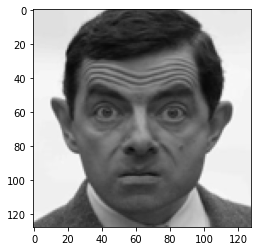

In [302]:

img = Image.open("align-bean1.jpg").convert('L')
img = img.resize((128,128))
img = np.array(img)

plt.imshow(img, cmap ='gray', vmin=0, vmax=255)

## Low Pass Image

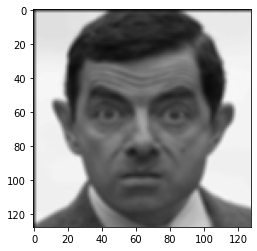

In [304]:
img = Image.open("align-bean1.jpg").convert('L')
img = img.resize((128,128))
img = np.array(img)
imgLowPass = applyLowPass(img, 3)
plt.imshow(imgLowPass, cmap ='gray', vmin=0, vmax=255)

## Original Image-2

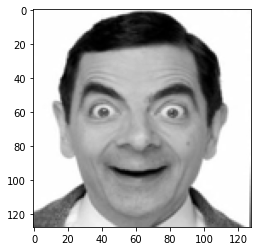

In [305]:
# Read the image
img = Image.open("align-bean2.jpg").convert('L')
img = img.resize((128,128))
img = np.array(img)

plt.imshow(img, cmap ='gray', vmin=0, vmax=255)


In [306]:
def applyHighFilter(img: np.array, filterSize: int)-> np.array:
    """
        img: Image to apply the mask
        maskSize: size of mask to apply

    """
    mask = np.ones([filterSize, filterSize], dtype = int)
    totSize = filterSize*filterSize
    mask = mask/totSize
    mask = -1*(mask)
    mask[filterSize//2][filterSize//2] = (8)/(totSize)
    m, n = img.shape
    img = addPadding(img, filterSize-2)
    img_new = np.zeros([m, n])
    # print(mask)
    for i in range(m):
        for j in range(n):
            temp = 0
            for k1 in range(filterSize):
                for k2 in range(filterSize):
                    temp += mask[k1, k2]*img[i-filterSize//2+k1, j-filterSize//2+k2]
            
            img_new[i, j]= temp
    return img_new

# High Pass filter Image

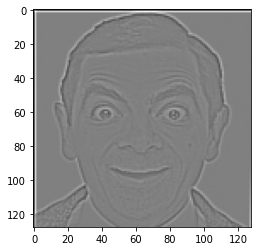

In [307]:
img = Image.open("align-bean2.jpg").convert('L')
img = img.resize((128,128))
img = np.array(img)
imgHighPass = applyHighFilter(img, 3)
plt.imshow(imgHighPass + 0.5*255, cmap ='gray', vmin=0, vmax=255)

# Combined Images for Different Mask Sizes
MASK Size-3

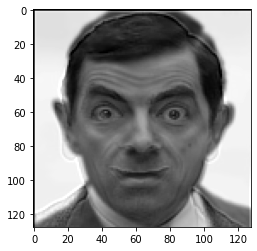

In [308]:

imgCombined = np.add(imgHighPass,imgLowPass)

plt.imshow(imgCombined, cmap ='gray', vmin=0, vmax=255)

## MASK SIZE - 5

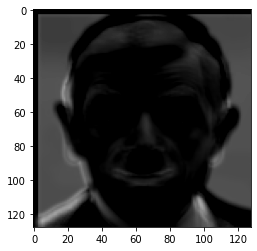

In [309]:
img = Image.open("align-bean1.jpg").convert('L')
img = img.resize((128,128))
img = np.array(img)
imgLowPass = applyLowPass(img, 5)

img = Image.open("align-bean2.jpg").convert('L')
img = img.resize((128,128))
img = np.array(img)
imgHighPass = applyHighFilter(img, 5)

imgCombined = np.array(imgHighPass) + np.array(imgLowPass)
plt.imshow(imgCombined, cmap ='gray', vmin=0, vmax=255)

In [310]:
def getNormDist(x, mean, standDev):
    return 1 / (np.sqrt(2 * np.pi) * standDev) * np.e ** (-np.power((x -mean) / standDev, 2) / 2)
 
 
def gaussianKernel(size, sigma=1):
    kernel1 = np.linspace(-(size // 2), size // 2, size)
    for i in range(size):
        kernel1[i] = getNormDist(kernel1[i], 0, sigma)
    kernel2 = np.outer(kernel1.T, kernel1.T)
 
    
 
    return kernel2

[[0.05854983 0.09653235 0.05854983]
 [0.09653235 0.15915494 0.09653235]
 [0.05854983 0.09653235 0.05854983]]


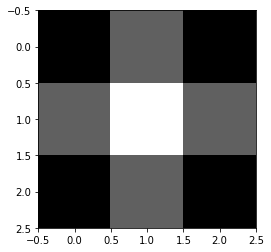

In [311]:
gKernel = gaussianKernel(3)
print(gKernel)
plt.imshow(gKernel, cmap ='gray')

In [314]:
def applyGaussianBlur(img: np.array, filterSize: int = 3 ,sigma: int = 1, mask = []) -> np.array:
    """
        `Image`: input Image 
        `filterSize`: size of filter to apply
        `ret`: smoothened Image
    """
    
    mask = gaussianKernel(filterSize, sigma = sigma)
    # print(mask)
    m, n = img.shape
    img = addPadding(img, filterSize-2)
    img_new = np.zeros([m, n])
    
    for i in range(m):
        for j in range(n):
            temp = 0
            for k1 in range(filterSize):
                for k2 in range(filterSize):
                    temp += mask[k1, k2]*img[i-filterSize//2+k1, j-filterSize//2+k2]
                    
            img_new[i, j]= temp
    return img_new

## Appllying Gaussian Blur with different Params
1. sigma = 1, filterSize = 3

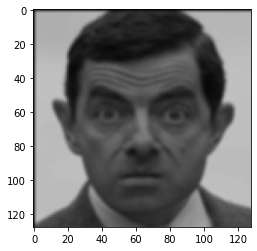

In [315]:
img = Image.open("align-bean1.jpg").convert('L')
img = img.resize((128,128))
img = np.array(img)
imgGaussian = applyGaussianBlur(img, filterSize =3,sigma = 1)
plt.imshow(imgGaussian, cmap ='gray', vmin=0, vmax=255)

Sigma =1, filterSize = 5

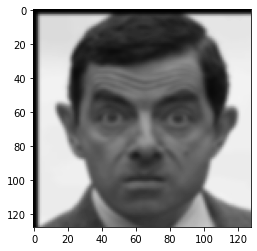

In [317]:
img = Image.open("align-bean1.jpg").convert('L')
img = img.resize((128,128))
img = np.array(img)

imgGaussian = applyGaussianBlur(img, filterSize=5, sigma= 1)
plt.imshow(imgGaussian, cmap ='gray', vmin=0, vmax=255)

sigma = 2, filterSize = 7

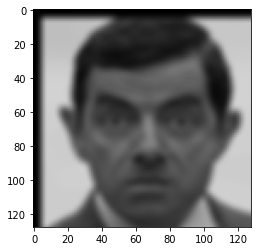

In [318]:
img = Image.open("align-bean1.jpg").convert('L')
img = img.resize((128,128))
img = np.array(img)

imgGaussian = applyGaussianBlur(img, filterSize = 7,sigma=2)
plt.imshow(imgGaussian, cmap ='gray', vmin=0, vmax=255)

In [319]:
def downSample(img: np.array)-> np.array:
    img = applyGaussianBlur(img, 5)
    n,m = img.shape
    imgDownSample = np.zeros((n//2, m//2))
    for i in range(n//2):
        for j in range(m//2):
            imgDownSample[i][j] = img[2*i][2*j]

    return imgDownSample

In [320]:
def makeGaussianPyramid(img : np.array, levels: int=3, verbose: bool = False):
    gaussianPyramid = [img]
    for _ in range(levels):
        imgDownscaled = downSample(img)
        img = imgDownscaled
        gaussianPyramid.append(img)

    if(verbose):
        plt.autoscale(False)
        for img in gaussianPyramid: 
            plt.figimage(img, cmap='gray')

    return gaussianPyramid

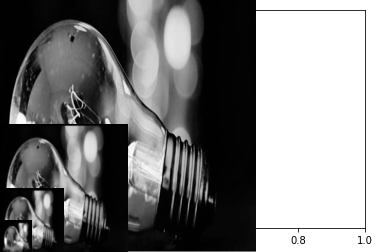

In [322]:
img = Image.open("lightBulb.jpeg").convert('L')
img = img.resize((256,256))
img = np.array(img)

gPyramid = makeGaussianPyramid(img, levels = 3, verbose = True)

In [325]:
def upSample(img: np.array) -> np.array:
    """
        Adds zeros in alternating rows and columns and apply gaussain blurr
        `img`: Image to be upsampled
        `ret`: the upsampled image

    """
    n,m = img.shape
    imgNew = np.zeros((2*n,2*m))

    for i in range(n):
        for j in range(m):
            imgNew[2*i,2*j] = img[i,j]
    
    imgNew = applyGaussianBlur(imgNew, filterSize = 5)
    return 4*imgNew

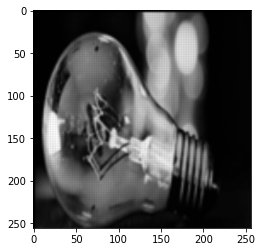

In [326]:
img = Image.open("lightBulb.jpeg").convert('L')
img = img.resize((128,128))
img = np.array(img)

imgUpsampled = upSample(img)
plt.imshow(imgUpsampled, cmap ='gray')

In [327]:
def makeLaplacianPyramid(img: np.array, levels: int =3, verbose: bool = False):
    gaussianPyramid = makeGaussianPyramid(img, levels=levels)
    laplacianPyramid = [gaussianPyramid[-1]]
    for idx in range(levels-1,-1,-1):
        lapSub = np.array(upSample(laplacianPyramid[-1]))
        lapImg = np.subtract(gaussianPyramid[idx],lapSub)
        laplacianPyramid.append(lapImg)

    
    laplacianPyramid.reverse()

    if(verbose):
        plt.autoscale(False)
        for img in laplacianPyramid: 
            plt.figimage(img, cmap='gray')
    
    return laplacianPyramid

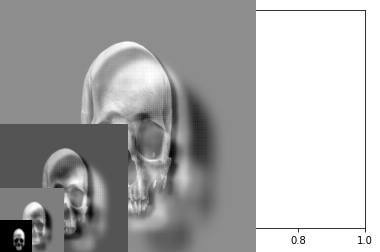

In [329]:
img = Image.open("skull.jpeg").convert('L')
img = img.resize((256,256))
img = np.array(img)

lPyramid  = makeLaplacianPyramid(img, 3, verbose = True)

In [330]:
def blendImgs(img1: np.array, img2: np.array, r1: float = 0.5) -> Image:
    lapPyramid1 = makeLaplacianPyramid(img1)
    lapPyramid2 = makeLaplacianPyramid(img2)

    levels = len(lapPyramid1)
    blendPyramids = [np.add(r1*lapPyramid1[i],(1-r1)*lapPyramid2[i]) for i in range(levels)]
    
    blendImg = blendPyramids[-1]
    for idx in range(levels-2,-1,-1):
        blendImg = np.add(upSample(blendImg), blendPyramids[idx])
    
    return blendImg


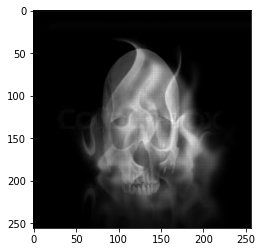

In [333]:
img1 = Image.open("fire.jpeg").convert('L')
img1 = img1.resize((256,256))
img1 = np.array(img1)


img2 = Image.open("skull.jpeg").convert('L')
img2 = img2.resize((256,256))
img2 = np.array(img2)

blendedImg = blendImgs(img1, img2, 0.7)

plt.imshow(blendedImg, cmap='gray')

# Qn-5 Frequency domain mixing

In [334]:
import numpy as np

def createLPFilter(n: int,m: int, radius) -> np.array:
    """
        Creates a Gaussian low-pass filter
            B[r,c] = e^-(Dr,c)/ 4*radius^2
        
        `n,m` : shape of image
        `center`: coordinate of center of image
        `radius`: given radius of image

        `ret`: lowPass Gaussian filter
    """

    rows, cols = n,m
    r, c = np.mgrid[0:rows:1, 0:cols:1]
    center = (n//2, m//2)
    c -= center[0]
    r -= center[1]
    d = np.power(c, 2.0) + np.power(r, 2.0)
    
    lpFilter = np.exp(-d/(2*pow(radius, 2.0)))
    
    
    return lpFilter

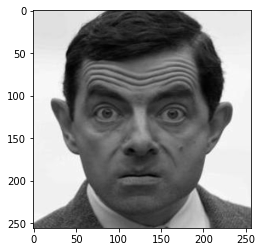

In [335]:
# Original Image
img = Image.open("align-bean1.jpg").convert('L')
img = img.resize((256,256))
plt.imshow(img, cmap='gray')

In [336]:
def doFFT(img: np.array) -> np.array:
    """
        Caculates discrete fourier transform of image array
    """
    dft = np.fft.fft2(img, axes=(0,1))
    dftShift = np.fft.fftshift(dft)
    return dftShift


def doIFT(img: np.array) -> np.array:
    """
        Calculates inverse fourier transform of array
    """
    backIshift = np.fft.ifftshift(img)
    imgFiltered = np.fft.ifft2(backIshift, axes=(0,1))
    return imgFiltered


def applyMask(img: np.array, mask: np.array) -> np.array:
    """
        Applies mask in frequency domain
    """
    return  np.multiply(img,mask)


def convertComplexToImg(arr: np.array) -> np.array:
    """
        Converts complex type array to visual array
    """
    img = np.abs(arr).clip(0,255)
    return img


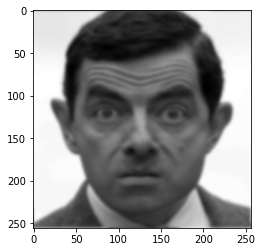

In [337]:
img = Image.open("align-bean1.jpg").convert('L')
img = img.resize((256,256))
img = np.array(img)
# Forward
dftImg = doFFT(img)
mask = createLPFilter(256, 256, 25)

# Masking
dftMasked = applyMask(dftImg, mask)

#Backward
complexImg = doIFT(dftMasked)
imgLowPass = convertComplexToImg(complexImg)

plt.imshow(imgLowPass, cmap='gray')

In [338]:
def createHPFilter(n: int,m: int, radius, n1: int=2) -> np.array:
    """
        Creates a Gaussian filter
        `n,m` : shape of image
        `center`: coordinate of center of image
        `radius`: given radius of image
        `n1`: parameter in filter

        `ret`: HighPass Gaussian filter
    """

    rows, cols = n,m
    r, c = np.mgrid[0:rows:1, 0:cols:1]
    center = (n//2, m//2)
    c -= center[0]
    r -= center[1]
    d = np.power(c, 2.0) + np.power(r, 2.0)
    
    hpFilter = 1.0 - np.exp(-d/(2*pow(radius, 2.0)))
    
    
    return hpFilter

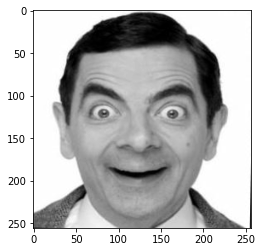

In [339]:
# Orignal Image
img = Image.open("align-bean2.jpg").convert('L')
img = img.resize((256,256))

plt.imshow(img, cmap='gray')

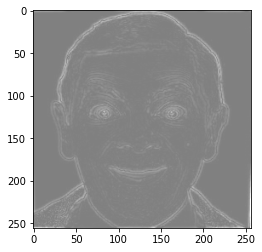

In [340]:
img = Image.open("align-bean2.jpg").convert('L')
img = img.resize((256,256))
img = np.array(img)
# Forward
dftImg = doFFT(img)
mask = createHPFilter(256, 256, 25)

# Masking
dftMasked = applyMask(dftImg, mask)

#Backward
complexImg = doIFT(dftMasked)
imgHighPass = convertComplexToImg(complexImg)

plt.imshow(imgHighPass+0.5*255,cmap='gray', vmin=0, vmax=255)

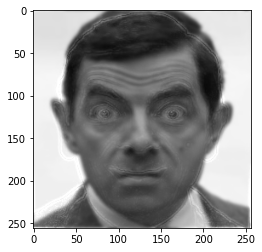

In [341]:
imgCombined = Image.fromarray(imgLowPass +imgHighPass)
plt.imshow(imgCombined, cmap='gray', vmin=0, vmax=255)

# Qn-6 
## Hybrid Mixing for color images

Using Laplacian Pyramids in spacial Domain

In [353]:
img1 = Image.open("skull.jpeg")
img1 = img1.resize((256,256))
img1 = np.array(img1)
R1 = img1[:,:,0] #get the Red part
G1 = img1[:,:,1] #get the Blue part
B1 = img1[:,:,2] #get the Green part

img2= Image.open("fire.jpeg")
img2 = img2.resize((256,256))
img2 = np.array(img2)
R2 = img2[:,:,0] #get the Red part
G2 = img2[:,:,1] #get the Blue part
B2 = img2[:,:,2] #get the Green part

print(R1.shape, R2.shape)
RBlended = blendImgs(R1,R2, 0.6)
GBlended = blendImgs(G1, G2, 0.6)
BBlended = blendImgs(B1, B2, 0.6)

RGB_Blended = np.dstack((RBlended, GBlended, BBlended))




(256, 256) (256, 256)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


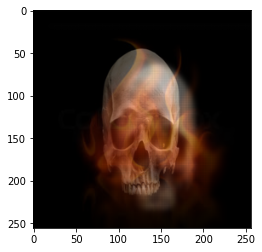

In [360]:
plt.imshow(RGB_Blended/np.max(RGB_Blended), vmin=0, vmax=255)

## Hybrid mixing in frequency domain

In [361]:
def applyLowPassFreq(img: np.array) -> np.array:
    n, m = img.shape
    dftImg = doFFT(img)
    mask = createLPFilter(n, m, 25)


    dftMasked = applyMask(dftImg, mask)


    complexImg = doIFT(dftMasked)
    imgLowPass = convertComplexToImg(complexImg)

    return imgLowPass

In [362]:
def applyHighPassFreq(img: np.array) -> np.array:
    n, m = img.shape
    dftImg = doFFT(img)
    mask = createHPFilter(n, m, 25)


    dftMasked = applyMask(dftImg, mask)


    complexImg = doIFT(dftMasked)
    imgHighPass = convertComplexToImg(complexImg)

    return imgHighPass

In [436]:
img1 = Image.open("fire.jpeg")
img1 = img1.resize((128,128))
img1 = np.array(img1)
R1 = img1[:,:,0] #get the Red part
G1 = img1[:,:,1] #get the Blue part
B1 = img1[:,:,2] #get the Green part

img2= Image.open("tree.jpeg")
img2 = img2.resize((128,128))
img2 = np.array(img2)
R2 = img2[:,:,0] #get the Red part
G2 = img2[:,:,1] #get the Blue part
B2 = img2[:,:,2] #get the Green part


RBlended = applyLowPassFreq(R1) + 7*applyHighPassFreq(R2)
GBlended =  applyLowPassFreq(G1) + 7*applyHighPassFreq(G2)
BBlended =  applyLowPassFreq(B1) + 7*applyHighPassFreq(B2)

RGB_Blended = np.dstack((RBlended, GBlended, BBlended))

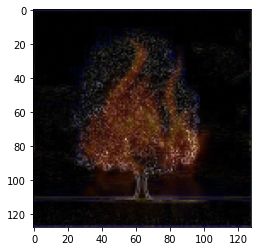

In [437]:
plt.imshow(RGB_Blended/np.max(RGB_Blended))